In [ ]:
# Download the dataset
!rm -rf * 
!gdown --id 1zwoPSKCXjm1Ra_PGIaMyDDnv7N_JH9Eb
!unzip crops
!rm -r "crops.zip"

In [30]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   rotation_range=5,  
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        'crops/train',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
        'crops/test',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 240 images belonging to 6 classes.
Found 69 images belonging to 6 classes.


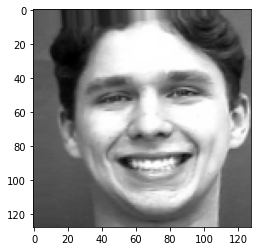

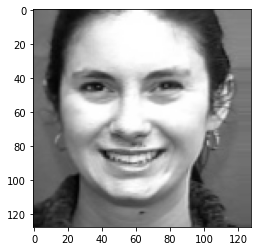

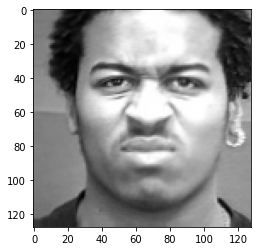

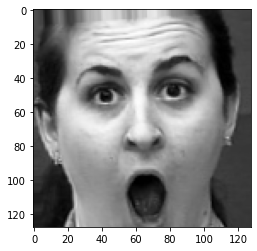

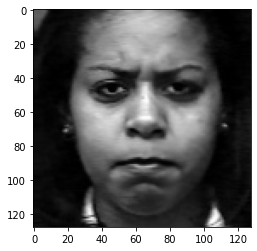

In [36]:
for _ in range(5):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.show()

In [ ]:
# Define Your Model HERE!
num_classes = 6
reg=keras.regularizers.l2(1e-4)

# define model
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'elu', input_shape=(128,128,3), kernel_regularizer=reg))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'elu', kernel_regularizer=reg))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'elu', kernel_regularizer=reg))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'elu', kernel_regularizer=reg))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Activation('elu'))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation= 'elu', kernel_regularizer=reg))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation= 'elu', kernel_regularizer=reg))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation= 'elu', kernel_regularizer=reg))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Activation('elu'))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation= 'elu', kernel_regularizer=reg))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Activation('elu'))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation= 'elu', kernel_regularizer=reg))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Activation('elu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=64, activation='elu', kernel_regularizer=reg))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_252 (Conv2D)          (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 124, 124, 32)      9248      
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 122, 122, 32)      9248      
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 120, 120, 32)      9248      
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_112 (Dropout)        (None, 60, 60, 32)        0         
_________________________________________________________________
activation_83 (Activation)   (None, 60, 60, 32)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 3s 207ms/step - loss: 2.2403 - acc: 0.1875 - val_loss: 1.8482 - val_acc: 0.3043
Epoch 2/100
8/8 [==============================] - 1s 163ms/step - loss: 1.8630 - acc: 0.2399 - val_loss: 1.8010 - val_acc: 0.2029
Epoch 3/100
8/8 [==============================] - 1s 161ms/step - loss: 1.7857 - acc: 0.2265 - val_loss: 1.9114 - val_acc: 0.1014
Epoch 4/100
8/8 [==============================] - 1s 161ms/step - loss: 1.8232 - acc: 0.2133 - val_loss: 1.7703 - val_acc: 0.3188
Epoch 5/100
8/8 [==============================] - 1s 158ms/step - loss: 1.8285 - acc: 0.2837 - val_loss: 1.8106 - val_acc: 0.2174
Epoch 6/100
8/8 [==============================] - 1s 162ms/step - loss: 1.8796 - acc: 0.2127 - val_loss: 1.6396 - val_acc: 0.4493
Epoch 7/100
8/8 [==============================] - 1s 162ms/step - loss: 1.7210 - acc: 0.3835 - val_loss: 1.4101 - val_acc: 0.6522
Epoch 8/100
8/8 [==============================] - 1s 162ms/step - loss: 1.4989 - a

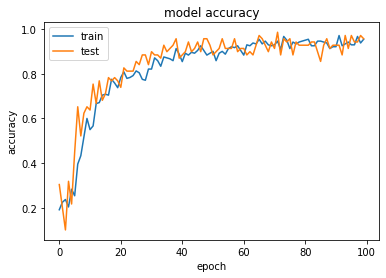

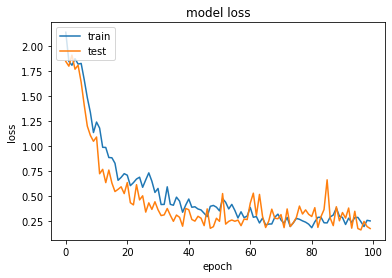

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()